In [1]:
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from numpy.polynomial.polynomial import polyfit
from scipy import signal
from scipy.stats import norm

import matplotlib

import matplotlib.pyplot as plt
import netCDF4 as nc
from matplotlib import pyplot
from matplotlib import colors as mcolors
import matplotlib.gridspec as gridspec
from scipy.stats import norm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import gcm_filters

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.colors as colors
from matplotlib import ticker, cm


In [10]:
FLDR_AGRIF = '/data/vdi/tbrivoal/RUNS_DATA/EXP02_AGRIF_finaldomain_bathycorrected_qco_boost2_noslip/'
FLDR_TWIN = '/data/vdi/tbrivoal/RUNS_DATA/eNEATL36_trunk_r4_2-RC_r15113_IFS_EXP02_2017_2018_AGRIFTWIN_BFR/'
ds_AGRIF_subdaily = xr.open_dataset(FLDR_AGRIF + 'eNEATL36_1d_KE_subdaily.nc')
ds_TWIN_subdaily = xr.open_dataset(FLDR_TWIN + 'eNEATL36_1d_KE_subdaily.nc')

ds_AGRIF_submonthly= xr.open_dataset(FLDR_AGRIF + 'eNEATL36_1d_KE_submonthly.nc')
ds_TWIN_submonthly = xr.open_dataset(FLDR_TWIN + 'eNEATL36_1d_KE_submonthly.nc')

# ds_AGRIF_monthly= xr.open_dataset(FLDR_AGRIF + 'eNEATL36_1h_KE_rolling31j.nc')
# ds_TWIN_monthly = xr.open_dataset(FLDR_TWIN + 'eNEATL36_1h_KE_rolling31j.nc')

In [11]:
KE_subdaily_AGRIF = ds_AGRIF_subdaily.KE
KE_subdaily_TWIN = ds_TWIN_subdaily.KE

KE_submonthly_AGRIF = ds_AGRIF_submonthly.KE
KE_submonthly_TWIN = ds_TWIN_submonthly.KE

# KE_monthly_AGRIF = ds_AGRIF_monthly.KE
# KE_monthly_TWIN = ds_TWIN_monthly.KE

In [7]:
print(KE_subdaily_AGRIF.mean())
print(KE_subdaily_TWIN.mean())


<xarray.DataArray 'KE' ()>
array(0.02711949, dtype=float32)
<xarray.DataArray 'KE' ()>
array(0.02787642, dtype=float32)


In [10]:
print(KE_submonthly_AGRIF.mean())
print(KE_submonthly_TWIN.mean())

<xarray.DataArray 'KE' ()>
array(0.00526721, dtype=float32)
<xarray.DataArray 'KE' ()>
array(0.00500873, dtype=float32)


In [5]:
Coordfile = xr.open_dataset('/data/vdi/tbrivoal/PRE_PROCESSING_IMMERSE/BATHY/DOMAINcfgs/domain_cfg_init.nc', drop_variables={"x", "y",})
lon=Coordfile.glamt.squeeze()
lat=Coordfile.gphit.squeeze()
bathy=Coordfile.bathy_metry.squeeze()

In [8]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkblue","blue","white","red","firebrick"])
darkred = plt.cm.Reds(np.linspace(0.99, 1, 2))
darkblue = plt.cm.YlGnBu(np.linspace(0.99, 1, 2))
bwr_cmap1 = cmap(np.linspace(0, 0.5, 252))
bwr_cmap2 = cmap(np.linspace(0.5, 1, 252))
w_cmap = cmap(np.linspace(0.5, 0.5, 78))
# bwr_cmap2 = plt.cm.(np.linspace(0.5, 1, 126))
# combine them and build a new colormap
colors = np.vstack((darkblue,bwr_cmap1,w_cmap,bwr_cmap2,darkred))
mymap =mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


In [12]:
diff_subdaily = KE_subdaily_AGRIF - KE_subdaily_TWIN
diff_submonthly = KE_submonthly_AGRIF - KE_submonthly_TWIN
# diff_monthly = KE_monthly_AGRIF - KE_monthly_TWIN


/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


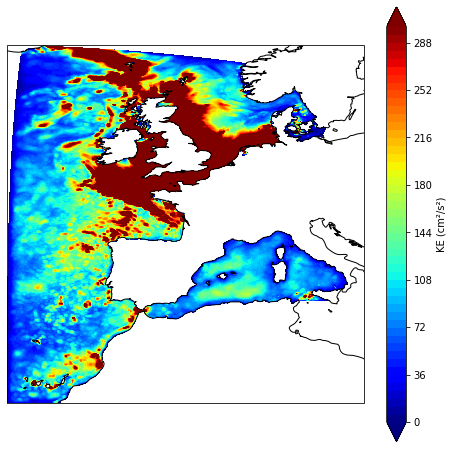

In [74]:
proj=ccrs.PlateCarree()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon, lat ,KE_subdaily_TWIN.mean(dim="time_counter").values *100 *100, levels=np.linspace(0,300,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1,label='KE (cm²/s²)')

# plt.close()
plt.savefig('KE_subdaily_TWIN_BFR.png')

/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


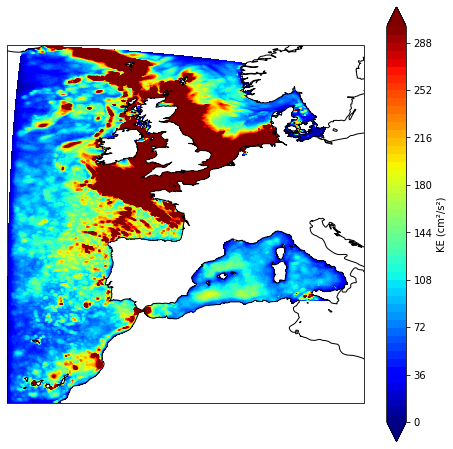

In [69]:
proj=ccrs.PlateCarree()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon, lat ,KE_subdaily_AGRIF.mean(dim="time_counter").values *100 *100, levels=np.linspace(0,300,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1,label='KE (cm²/s²)')

# plt.close()
plt.savefig('KE_subdaily_AGRIF.png')

/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


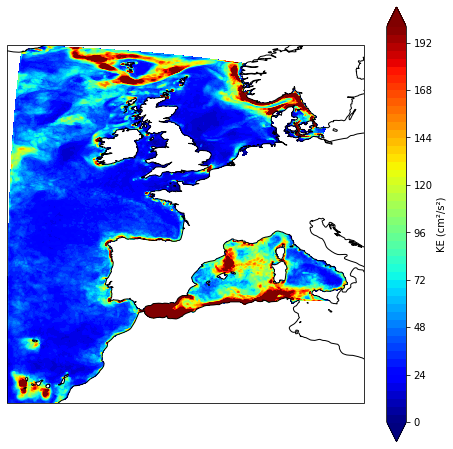

In [70]:
proj=ccrs.PlateCarree()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon, lat ,KE_submonthly_AGRIF.mean(dim="time_counter").values *100 *100, levels=np.linspace(0,200,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1,label='KE (cm²/s²)')

# plt.close()
plt.savefig('KE_submonthly_AGRIF.png')

/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


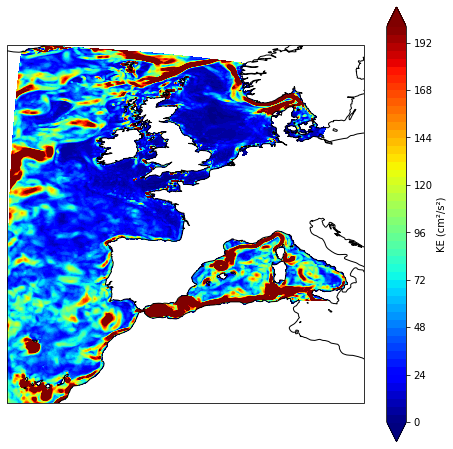

In [75]:
proj=ccrs.PlateCarree()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon, lat ,KE_monthly_AGRIF.mean(dim="time_counter").values *100 *100, levels=np.linspace(0,200,51), cmap="jet",transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1,label='KE (cm²/s²)')

# plt.close()
plt.savefig('KE_monthly_AGRIF.png')

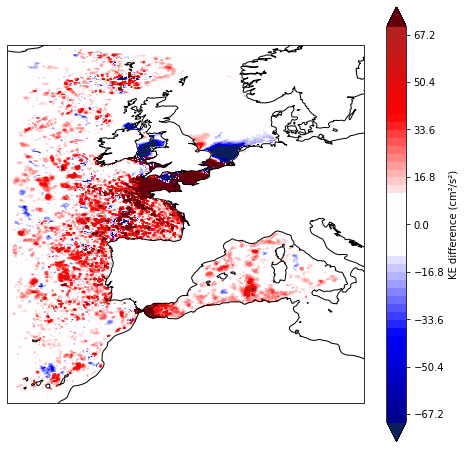

In [9]:
proj=ccrs.PlateCarree()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon, lat ,diff_subdaily.mean(dim="time_counter").values *100 *100, levels=np.linspace(-70,70,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1,label='KE difference (cm²/s²)')

# plt.close()
plt.savefig('KE_difference_subdaily_BFR.png')

/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


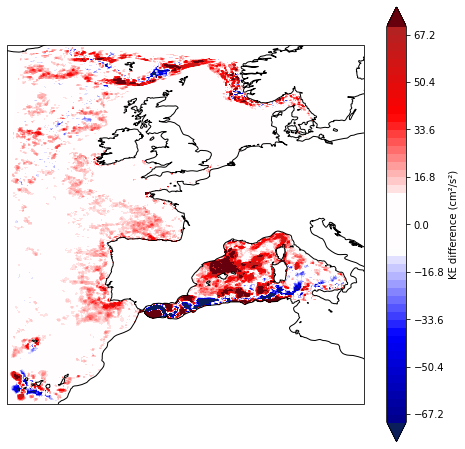

In [13]:
proj=ccrs.PlateCarree()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon, lat ,diff_submonthly.mean(dim="time_counter").values *100 *100, levels=np.linspace(-70,70,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1,label='KE difference (cm²/s²)')

# plt.close()
plt.savefig('KE_difference_submonthly.png')

/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/data/rd_exchange/tbrivoal/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


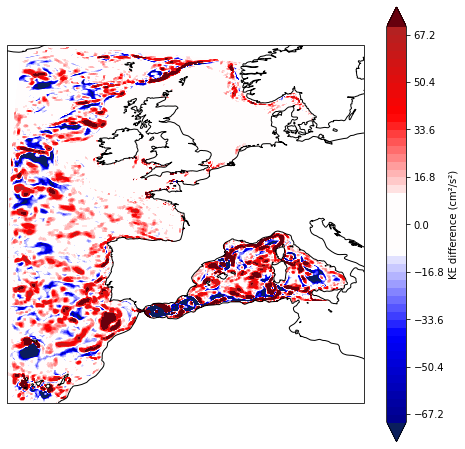

In [67]:
proj=ccrs.PlateCarree()

fig=plt.figure(figsize=(8,8))
# ax = plt.subplot(121, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(resolution='50m')
lon_formatter = LongitudeFormatter(degree_symbol='° ')
lat_formatter = LatitudeFormatter(degree_symbol='° ')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

axes=ax.gridlines( draw_labels=False, linewidth=0)
axes.ylabels_right = False
axes.xlabels_top = False

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

im1 = plt.contourf(lon, lat ,diff_monthly.mean(dim="time_counter").values *100 *100, levels=np.linspace(-70,70,51), cmap=mymap,transform=ccrs.PlateCarree(),extend='both')
plt.colorbar(im1,label='KE difference (cm²/s²)')

# plt.close()
plt.savefig('KE_difference_monthly.png')